## Importing required modules

In [139]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [140]:
train_raw = pd.read_csv('wine.csv', header = None)
train_raw.columns = ['Label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
train = train_raw.drop(['Label'],axis=1)
train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# K-means clustering
To cluster them according to wine quality

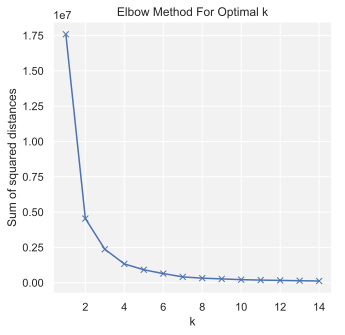

In [161]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(train)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(5,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here we know that there are three different qualities of wine so we choose k to be 3 but in general if we don't know that we can use above elbow method to find the optimal number of clusters.

In [162]:
kmeans = KMeans(n_clusters=3, random_state=9)
clusters = kmeans.fit_predict(train)
kmeans.cluster_centers_.shape

(3, 13)

In [163]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(train_raw.Label[mask])[0]

In [164]:
accuracy_score(train_raw.Label, labels)

0.702247191011236

# PCA

In [165]:
scaler = StandardScaler()
scaled = scaler.fit_transform(train)

pca = PCA(n_components=2)

principal_components = pca.fit_transform(scaled)
                    
proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

In [166]:
kmeans = KMeans(n_clusters=3, random_state=9)
clusters = kmeans.fit_predict(proj)

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(train_raw.Label[mask])[0]

In [167]:
accuracy_score(train_raw.Label, labels)

0.9662921348314607

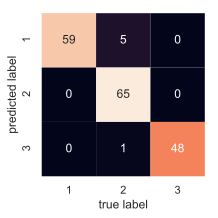

In [168]:
mat = confusion_matrix(train_raw.Label, labels)
plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train_raw.Label.unique(),
            yticklabels=train_raw.Label.unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

# t-SNE

In [169]:
tsne = TSNE(n_components=2, init='random', random_state=9)
tsne_data = tsne.fit_transform(train)

In [170]:
kmeans = KMeans(n_clusters=3, random_state=9)
clusters = kmeans.fit_predict(tsne_data)

In [171]:
labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    labels[mask] = mode(train_raw.Label[mask])[0]

In [172]:
accuracy_score(train_raw.Label, labels)

0.7247191011235955

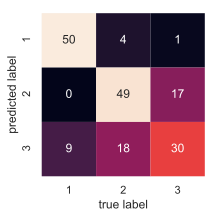

In [173]:
mat = confusion_matrix(train_raw.Label, labels)
plt.figure(figsize=(3,3))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train_raw.Label.unique(),
            yticklabels=train_raw.Label.unique())
plt.xlabel('true label')
plt.ylabel('predicted label');

ready


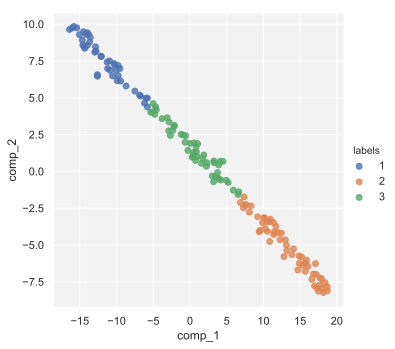

In [174]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
tsne = pd.DataFrame(tsne_data)
tsne.columns = ["comp_1", "comp_2"]
tsne["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = tsne.sample(150) ,fit_reg=False)
print("ready")